In [1]:
import networkx as nx
from matplotlib import pyplot as plt
import copy

In [2]:
import sys
sys.path.append('../')
from barfi import Block

In [3]:
feed = Block(name='Feed')
feed.add_output()
def feed_func(self):
    self.set_interface(name='Output 1', value=4)
feed.add_calculate(feed_func)

splitter = Block(name='Splitter')
splitter.add_input()
splitter.add_output()
splitter.add_output()
def splitter_func(self):
    in_1 = self.get_interface(name='Input 1')
    value=(in_1/2)
    self.set_interface(name='Output 1', value=value)
    self.set_interface(name='Output 2', value=value)
splitter.add_calculate(splitter_func)

mixer = Block(name='Mixer')
mixer.add_input()
mixer.add_input()
mixer.add_output()
def mixer_func(self):
    in_1 = self.get_interface(name='Input 1')
    in_2 = self.get_interface(name='Input 2')
    value=(in_1 + in_2)
    self.set_interface(name='Output 1', value=value)
mixer.add_calculate(mixer_func)

result = Block(name='Result')
result.add_input()
def result_func(self):
    in_1 = self.get_interface(name='Input 1')
    print(in_1)
result.add_calculate(result_func)

blocks = [feed, result, mixer, splitter]

In [4]:
editor_state = {'nodes': [{'type': 'Feed', 'id': 'node_16421654445600', 'name': 'Feed', 'options': [], 'state': {}, 'interfaces': [['Output 1', {'id': 'ni_16421654445601', 'value': None}]], 'position': {'x': 53.10270771798835, 'y': 103.53598351788409}, 'width': 200, 'twoColumn': False, 'customClasses': ''}, {'type': 'Feed', 'id': 'node_16421655709876', 'name': 'Feed', 'options': [], 'state': {}, 'interfaces': [['Output 1', {'id': 'ni_16421655709877', 'value': None}]], 'position': {'x': -110.96319142010879, 'y': 354.1711813273622}, 'width': 200, 'twoColumn': False, 'customClasses': ''}, {'type': 'Splitter', 'id': 'node_16421655753058', 'name': 'Splitter', 'options': [], 'state': {}, 'interfaces': [['Input 1', {'id': 'ni_16421655753069', 'value': None}], ['Output 1', {'id': 'ni_164216557530610', 'value': None}], ['Output 2', {'id': 'ni_164216557530611', 'value': None}]], 'position': {'x': 160.08999419005372, 'y': 242.060177855096}, 'width': 200, 'twoColumn': False, 'customClasses': ''}, {'type': 'Mixer', 'id': 'node_164216557860312', 'name': 'Mixer', 'options': [], 'state': {}, 'interfaces': [['Input 1', {'id': 'ni_164216557860313', 'value': None}], ['Input 2', {'id': 'ni_164216557860314', 'value': None}], ['Output 1', {'id': 'ni_164216557860315', 'value': None}]], 'position': {'x': 428.30492654775384, 'y': 112.91965486805523}, 'width': 200, 'twoColumn': False, 'customClasses': ''}, {'type': 'Result', 'id': 'node_164216558728816', 'name': 'Result', 'options': [], 'state': {}, 'interfaces': [['Input 1', {'id': 'ni_164216558728817', 'value': None}]], 'position': {'x': 426.88579992152256, 'y': 335.7225351863563}, 'width': 200, 'twoColumn': False, 'customClasses': ''}], 'connections': [{'id': '164216559410520', 'from': 'ni_16421654445601', 'to': 'ni_164216557860313'}, {'id': '164216559592723', 'from': 'ni_164216557530610', 'to': 'ni_164216557860314'}, {'id': '164216559830026', 'from': 'ni_164216557530611', 'to': 'ni_164216558728817'}, {'id': '164216560187829', 'from': 'ni_16421655709877', 'to': 'ni_16421655753069'}], 'panning': {'x': 163.41400013998373, 'y': 110.67177791961308}, 'scaling': 0.7761150375278565}

In [5]:
G = nx.DiGraph()

In [6]:
active_blocks = {}
# change all these variable names to _map block to label, block to id, and blah blah, 
# and put all maps as a single map object dict
block_label = {}
interface_block_id = {}
active_connections = []
_map_interface_id_to_name = {}

if bool(editor_state):
    for block in editor_state['nodes']:
        interfaces = {}
        for interface in block['interfaces']:
            interface_block_id[interface[1]['id']] = block['id']
            interfaces[interface[0]] = interface[1]
            _map_interface_id_to_name[interface[1]['id']] = interface[0]
        parent_block = next(_b for _b in blocks if _b._type==block['type'])
        child_block = copy.deepcopy(parent_block)
        child_block._name = block['name']
        child_block._interface_value = interfaces
        active_blocks[block['id']] = {'block': child_block, 'interfaces': interfaces, 'type': block['type'], 'name': block['name']}
        block_label[block['id']] = block['name']
        # active_blocks[block['id']] = {'name': block['type'], 'id': block['id'], 'title': block['name'], 'interfaces': interfaces , 'interfaces_data': block['interfaces']}
    active_connections = editor_state['connections']

In [7]:
for block_id, block_value in active_blocks.items():
    G.add_node(block_id, name=block_value['name']) 

ni_from_to = {}
for connection in active_connections:
    from_node = interface_block_id[connection['from']]
    to_node = interface_block_id[connection['to']]
    ni_from_to[connection['from']] = connection['to']
    G.add_edge(from_node, to_node, edge_id=connection['id'])

In [8]:
if not nx.is_directed_acyclic_graph(G): print('Cycle(s) detected. Not supported by `barfi` at the moment.')
else: 
    _compu_order = [node for node in nx.topological_sort(G)]

In [9]:
active_blocks[_compu_order[0]]['block']._interface_value

{'Output 1': {'id': 'ni_16421654445601', 'value': None}}

In [10]:
active_blocks[_compu_order[0]]['block']._on_calculate() 

In [11]:
for key, value in active_blocks[_compu_order[0]]['block']._interface_value.items():
    find_to = ni_from_to[value['id']]
    find_to_block = interface_block_id[find_to]
    active_blocks[find_to_block]['block'].set_interface(name=_map_interface_id_to_name[find_to], value=value['value'])
    print(active_blocks[find_to_block])

{'block': <barfi.Block of type 'Mixer' at 0x122b7b400>, 'interfaces': {'Input 1': {'id': 'ni_164216557860313', 'value': 4}, 'Input 2': {'id': 'ni_164216557860314', 'value': None}, 'Output 1': {'id': 'ni_164216557860315', 'value': None}}, 'type': 'Mixer', 'name': 'Mixer'}


In [12]:
active_blocks[_compu_order[0]]['block']._interface_value

{'Output 1': {'id': 'ni_16421654445601', 'value': 4}}

In [13]:
for node in nx.topological_sort(G):
    # print((active_blocks[node]['block']))
    print(active_blocks[node])
    break

{'block': <barfi.Block of type 'Feed' at 0x122b7b2b0>, 'interfaces': {'Output 1': {'id': 'ni_16421654445601', 'value': 4}}, 'type': 'Feed', 'name': 'Feed'}


In [14]:
for block in blocks:
    print(block._type)

Feed
Result
Mixer
Splitter


In [15]:
active_blocks

{'node_16421654445600': {'block': <barfi.Block of type 'Feed' at 0x122b7b2b0>,
  'interfaces': {'Output 1': {'id': 'ni_16421654445601', 'value': 4}},
  'type': 'Feed',
  'name': 'Feed'},
 'node_16421655709876': {'block': <barfi.Block of type 'Feed' at 0x122b7b340>,
  'interfaces': {'Output 1': {'id': 'ni_16421655709877', 'value': None}},
  'type': 'Feed',
  'name': 'Feed'},
 'node_16421655753058': {'block': <barfi.Block of type 'Splitter' at 0x122b7b3a0>,
  'interfaces': {'Input 1': {'id': 'ni_16421655753069', 'value': None},
   'Output 1': {'id': 'ni_164216557530610', 'value': None},
   'Output 2': {'id': 'ni_164216557530611', 'value': None}},
  'type': 'Splitter',
  'name': 'Splitter'},
 'node_164216557860312': {'block': <barfi.Block of type 'Mixer' at 0x122b7b400>,
  'interfaces': {'Input 1': {'id': 'ni_164216557860313', 'value': 4},
   'Input 2': {'id': 'ni_164216557860314', 'value': None},
   'Output 1': {'id': 'ni_164216557860315', 'value': None}},
  'type': 'Mixer',
  'name': 'M

In [16]:
active_connections

[{'id': '164216559410520',
  'from': 'ni_16421654445601',
  'to': 'ni_164216557860313'},
 {'id': '164216559592723',
  'from': 'ni_164216557530610',
  'to': 'ni_164216557860314'},
 {'id': '164216559830026',
  'from': 'ni_164216557530611',
  'to': 'ni_164216558728817'},
 {'id': '164216560187829',
  'from': 'ni_16421655709877',
  'to': 'ni_16421655753069'}]

In [17]:
interface_block_id

{'ni_16421654445601': 'node_16421654445600',
 'ni_16421655709877': 'node_16421655709876',
 'ni_16421655753069': 'node_16421655753058',
 'ni_164216557530610': 'node_16421655753058',
 'ni_164216557530611': 'node_16421655753058',
 'ni_164216557860313': 'node_164216557860312',
 'ni_164216557860314': 'node_164216557860312',
 'ni_164216557860315': 'node_164216557860312',
 'ni_164216558728817': 'node_164216558728816'}

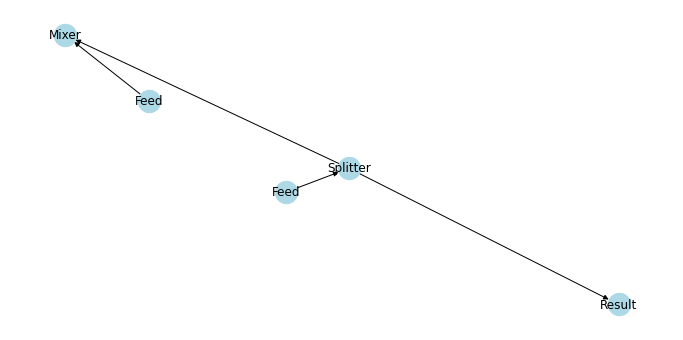

In [18]:
plt.subplots(figsize=(12,6))
nx.draw(G, with_labels=True, node_color='lightblue', node_size=500, labels = block_label)

In [19]:
block_label

{'node_16421654445600': 'Feed',
 'node_16421655709876': 'Feed',
 'node_16421655753058': 'Splitter',
 'node_164216557860312': 'Mixer',
 'node_164216558728816': 'Result'}

In [20]:
# To find cycles
# nx.find_cycle(G, orientation="original")
# try: 
#     [block_label[node] for node in nx.topological_sort(G)]
# except nx.NetworkXUnfeasible as error:
#         print(error)

In [21]:
# DG = nx.DiGraph([(interface_block_id[c['from']], interface_block_id[c['to']]) for c in active_connections])
# nx.is_directed_acyclic_graph(DG)